In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import matplotlib.pyplot as plt

In [2]:
import os
%cd drive/My\ Drive
!ls

/content/drive/My Drive
'Colab Notebooks'
'Getting started.pdf'
 glove.6B.100d.txt
 glove.6B.200d.txt
 glove.6B.300d.txt
 glove.6B.50d.txt
 glove.6B.zip
 input_data.xlsx
 Mahima-07-05-2020.wav
'Mahima Sehgal Automation Deliverable - QA Test Writing.gsheet'
 Sarcasm_Headlines_Dataset.json
 testrail-import-trial_proj-2020-05-22.cfg


In [3]:
import pandas as pd
df = pd.read_excel (r'input_data.xlsx')
print (df)

                                      Short description  ... Assignment group
0                                           login issue  ...            GRP_0
1                                               outlook  ...            GRP_0
2                                    cant log in to vpn  ...            GRP_0
3                         unable to access hr_tool page  ...            GRP_0
4                                          skype error   ...            GRP_0
...                                                 ...  ...              ...
8495                  emails not coming in from zz mail  ...           GRP_29
8496                           telephony_software issue  ...            GRP_0
8497  vip2: windows password reset for tifpdchb pedx...  ...            GRP_0
8498                     machine nÃ£o estÃ¡ funcionando  ...           GRP_62
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...           GRP_49

[8500 rows x 4 columns]


In [4]:
df.shape

(8500, 4)

In [5]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [6]:
df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_35       1
GRP_67       1
GRP_70       1
GRP_64       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


**PRE-PROCESSING STEPS**
- Replacing Nan Values with Blank text string
- Grouping The Groups with less than 20 Tickets to seperate group
- Removing Duplicate Rows
- Group Description, Short Description and Caller to one group
- Text pre-processing on new text field

In [12]:
#Before Removing Nan
df.describe().transpose()

,count,unique,top,freq
Short description,8492,7481,password reset,38
Description,8499,7817,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


In [13]:
df[df.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [0]:
import numpy as np
# Replace all Nan entries with empty string
df = df.replace(np.nan, '', regex=True)

In [6]:
#After Removing Nan
df.describe().transpose()

,count,unique,top,freq
Short description,8500,7482,password reset,38
Description,8500,7818,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


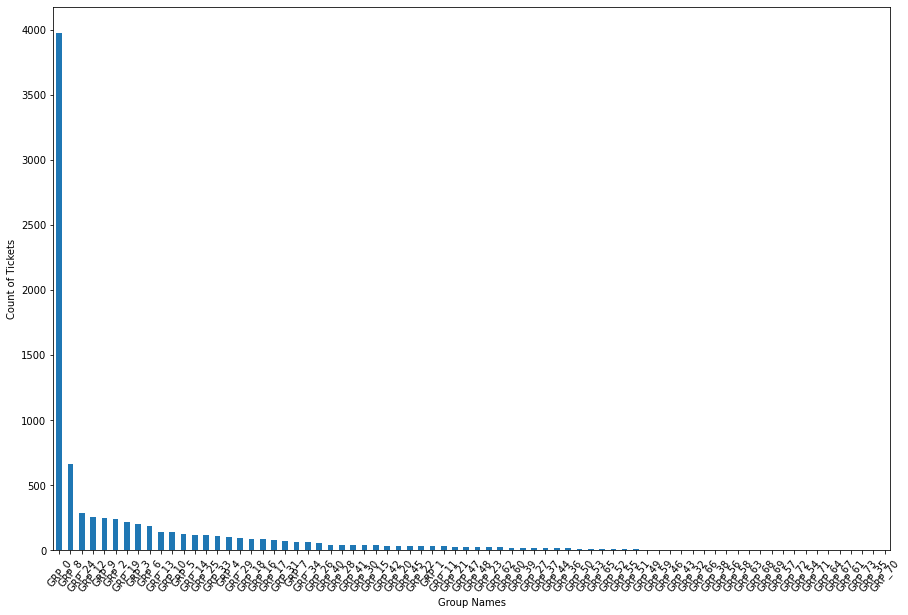

In [23]:
# Groupby by Group ID
group_df = df.groupby("Assignment group")

plt.figure(figsize=(15,10))
group_df.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Group Names")
plt.ylabel("Count of Tickets")
plt.show()

In [8]:
#Combining Groups with less tickets
small_df = df[df.groupby('Assignment group')['Assignment group'].transform('size') < 10]
small_df.describe()


,Short description,Description,Caller,Assignment group
count,87,87,87,87
unique,86,86,73,25
top,product selector not working,update cutview to lauacyltoe hxgaycze version ...,lenxvcbq vwnhjtoi,GRP_52
freq,2,2,5,9


In [0]:
#Assigining these to a seperate group altogether
df.loc[df.groupby('Assignment group')['Assignment group'].transform('size') < 10 , 'Assignment group'] =  'SUBGROUP-X'

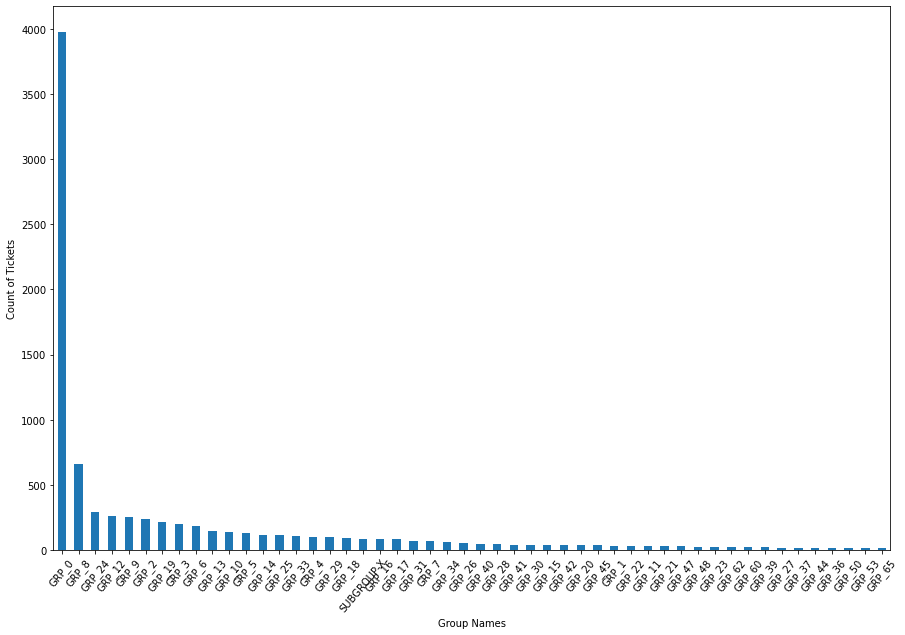

In [12]:
# Groupby by Group ID
group_df = df.groupby("Assignment group")
plt.figure(figsize=(15,10))
group_df.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Group Names")
plt.ylabel("Count of Tickets")
plt.show()

In [0]:
#Remove Duplicate Rows
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF.head()
df.drop_duplicates(keep=False,inplace=True)

In [14]:
df.describe()

,Short description,Description,Caller,Assignment group
count,8360,8360,8360,8360
unique,7440,7783,2944,50
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,34,771,3908


In [0]:
#Combine Text Fields
df['Final Description'] = df['Short description'].str.cat(df['Description'],sep=" ")
df['Final Description'] = df['Final Description'].str.cat(df['Caller'],sep=" ")

In [16]:
df['Final Description'].head()

0    login issue -verified user details.(employee# ...
1    outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2    cant log in to vpn \r\n\r\nreceived from: eylq...
3    unable to access hr_tool page unable to access...
4          skype error  skype error  owlgqjme qhcozdfx
Name: Final Description, dtype: object

In [0]:
## Decontract the words
import re
def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"cant", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text



In [18]:
df['Final Description'] = df['Final Description'].apply(lambda x: decontract(x))
df.head()

,Short description,Description,Caller,Assignment group,Final Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,can not log in to vpn \r\n\r\nreceived from: e...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error owlgqjme qhcozdfx


In [0]:
# Data Normalization
import re
def  clean_text(df, text_field, new_text_field_name):
    #convert to lower case
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    #remove single letters
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\b[a-zA-Z]\b", "", elem))  
    return df

In [20]:
df_clean = clean_text(df, 'Final Description', 'Description Clean')
df_clean


,Short description,Description,Caller,Assignment group,Final Description,Description Clean
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue verified user details employee ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,outlook received from hmjdrvpb komuaywn ...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,can not log in to vpn \r\n\r\nreceived from: e...,can not log in to vpn received from eylqg...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error owlgqjme qhcozdfx,skype error skype error owlgqjme qhcozdfx
...,...,...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail \r\n\r\nrece...,emails not coming in from zz mail received...
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue telephony_software is...,telephony software issue telephony software is...
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2: windows password reset for tifpdchb pedx...,vip windows password reset for tifpdchb pedxr...
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine est funcionando am unable to acc...


In [21]:
df_clean = df_clean.drop(['Short description', 'Description','Caller','Final Description'], axis=1)
df_clean.head()

,Assignment group,Description Clean
0,GRP_0,login issue verified user details employee ...
1,GRP_0,outlook received from hmjdrvpb komuaywn ...
2,GRP_0,can not log in to vpn received from eylqg...
3,GRP_0,unable to access hr tool page unable to access...
4,GRP_0,skype error skype error owlgqjme qhcozdfx


There are 2112476 words in the combination of all review.


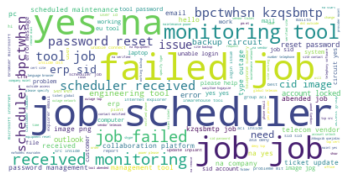

In [22]:
#Showcase Word Cloud
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator


text = " ".join(review for review in df_clean['Description Clean'])
print ("There are {} words in the combination of all review.".format(len(text)))
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
# Data Cleaning -- Removing Stop words
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
newStopWords = ["na","sid","cid","null","hi","png","eu","hello"]
stop.extend(newStopWords)

df_clean['Description Clean'] = df_clean['Description Clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Assignment group,Description Clean
0,GRP_0,login issue verified user details employee man...
1,GRP_0,outlook received hmjdrvpb komuaywn com team me...
2,GRP_0,log vpn received eylqgodm ybqkwiam com cannot ...
3,GRP_0,unable access hr tool page unable access hr to...
4,GRP_0,skype error skype error owlgqjme qhcozdfx


There are 1524494 words in the combination of all review.


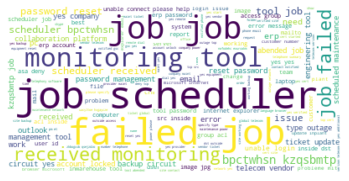

In [24]:
text = " ".join(review for review in df_clean['Description Clean'])
print ("There are {} words in the combination of all review.".format(len(text)))
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
# Getting Word Tokens
import nltk 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
df_clean['Description Clean Tokens'] = df_clean['Description Clean'].apply(lambda x: word_tokenize(x))
df_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Assignment group,Description Clean,Description Clean Tokens
0,GRP_0,login issue verified user details employee man...,"[login, issue, verified, user, details, employ..."
1,GRP_0,outlook received hmjdrvpb komuaywn com team me...,"[outlook, received, hmjdrvpb, komuaywn, com, t..."
2,GRP_0,log vpn received eylqgodm ybqkwiam com cannot ...,"[log, vpn, received, eylqgodm, ybqkwiam, com, ..."
3,GRP_0,unable access hr tool page unable access hr to...,"[unable, access, hr, tool, page, unable, acces..."
4,GRP_0,skype error skype error owlgqjme qhcozdfx,"[skype, error, skype, error, owlgqjme, qhcozdfx]"


In [0]:
#Stemming Fine word stems 
from nltk.stem import PorterStemmer
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text
df_clean['Description Stem'] = df_clean['Description Clean Tokens'].apply(lambda x: word_stemmer(x))


In [27]:
#Lemmatization Find word Lemmas
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
df_clean['Description lemma'] = df_clean['Description Stem'].apply(lambda x: word_lemmatizer(x))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [28]:
#POS Tagging
def word_pos_tagger(text):
    pos_tagged_text = nltk.pos_tag(text)
    return pos_tagged_text
nltk.download('averaged_perceptron_tagger')
df_clean['Description POS'] = df_clean['Description Clean Tokens'].apply(lambda x: word_pos_tagger(x))
df_clean.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Assignment group,Description Clean,Description Clean Tokens,Description Stem,Description lemma,Description POS
0,GRP_0,login issue verified user details employee man...,"[login, issue, verified, user, details, employ...","[login, issu, verifi, user, detail, employe, m...","[login, issu, verifi, user, detail, employe, m...","[(login, JJ), (issue, NN), (verified, VBD), (u..."
1,GRP_0,outlook received hmjdrvpb komuaywn com team me...,"[outlook, received, hmjdrvpb, komuaywn, com, t...","[outlook, receiv, hmjdrvpb, komuaywn, com, tea...","[outlook, receiv, hmjdrvpb, komuaywn, com, tea...","[(outlook, NN), (received, VBD), (hmjdrvpb, JJ..."
2,GRP_0,log vpn received eylqgodm ybqkwiam com cannot ...,"[log, vpn, received, eylqgodm, ybqkwiam, com, ...","[log, vpn, receiv, eylqgodm, ybqkwiam, com, ca...","[log, vpn, receiv, eylqgodm, ybqkwiam, com, ca...","[(log, NN), (vpn, NN), (received, VBD), (eylqg..."
3,GRP_0,unable access hr tool page unable access hr to...,"[unable, access, hr, tool, page, unable, acces...","[unabl, access, hr, tool, page, unabl, access,...","[unabl, access, hr, tool, page, unabl, access,...","[(unable, JJ), (access, NN), (hr, NN), (tool, ..."
4,GRP_0,skype error skype error owlgqjme qhcozdfx,"[skype, error, skype, error, owlgqjme, qhcozdfx]","[skype, error, skype, error, owlgqjm, qhcozdfx]","[skype, error, skype, error, owlgqjm, qhcozdfx]","[(skype, JJ), (error, NN), (skype, NN), (error..."


**Defining Train and Test Data**

In [0]:
from sklearn.model_selection import train_test_split
X = df_clean['Description Clean']
y = df['Assignment group']
X_train, X_validation, y_train, y_validation = train_test_split(X,y, test_size = 0.2, random_state = 10)

**Using TFIDF for Model**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
X_vector = tfidf_vectorizer.transform(X_train)
X_vector_validation = tfidf_vectorizer.transform(X_validation)

X_vector_train, X_vector_test, y_vector_train, y_test = train_test_split(
    X_vector, y_train, train_size = 0.8
)

In [50]:
from sklearn.model_selection import GridSearchCV   
# defining parameter range 
param_grid = {'C': [ 0.01, 0.25, 0.5, 1, 10, 100, 1000] }  
lr = LogisticRegression()  
grid = GridSearchCV(lr, param_grid, refit = True ) 
  
# fitting the model for grid search 
grid.fit(X_vector_train, y_vector_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.25, 0.5, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
# print best parameter after tuning 
print(grid.best_params_)   
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 



{'C': 1000}
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [52]:
#Getting Accuracy and Recall for Train Data
final_tfidf = LogisticRegression(C=1000)
final_tfidf.fit(X_vector_train, y_vector_train)
accuracy = accuracy_score(y_test, final_tfidf.predict(X_vector_test))
recall = recall_score(y_test, final_tfidf.predict(X_vector_test),average='weighted')
#print ('Accuracy: ',accuracy," Recall: ",recall)
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Accuracy': accuracy, 'Recall': recall})
resultsDf = resultsDf[['Method', 'Accuracy', 'Recall']]
resultsDf

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Method,Accuracy,Recall
0,Logistic Regression,0.651719,0.651719


In [54]:
#Getting Classification Report for Validation Data
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_vector_validation) 
# print classification report 
print(classification_report(y_validation, grid_predictions)) 

              precision    recall  f1-score   support

       GRP_0       0.75      0.92      0.83       787
       GRP_1       0.33      0.17      0.22         6
      GRP_10       0.94      0.48      0.64        33
      GRP_11       0.33      0.25      0.29         4
      GRP_12       0.58      0.55      0.56        53
      GRP_13       0.56      0.74      0.64        19
      GRP_14       0.65      0.35      0.46        31
      GRP_15       0.67      0.40      0.50         5
      GRP_16       0.50      0.15      0.24        13
      GRP_17       0.92      0.75      0.83        16
      GRP_18       0.75      0.53      0.62        17
      GRP_19       0.42      0.33      0.37        40
       GRP_2       0.56      0.48      0.52        56
      GRP_20       0.00      0.00      0.00        10
      GRP_21       0.50      0.25      0.33         4
      GRP_22       0.50      0.29      0.36         7
      GRP_23       1.00      0.88      0.93         8
      GRP_24       0.86    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Using SVM For the Model**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(X_train)
X_vector = ngram_vectorizer.transform(X_train)
X_vector_validation = ngram_vectorizer.transform(X_validation)

X_vector_train, X_vector_test, y_vector_train, y_test = train_test_split(
    X_vector, y_train, train_size = 0.8
)

In [57]:
# defining parameter range 
param_grid = {'C': [ 0.01, 0.05, 0.25, 1, 10, 100] }  
svm = LinearSVC()  
grid = GridSearchCV(svm, param_grid, refit = True ) 
  
# fitting the model for grid search 
grid.fit(X_vector_train, y_vector_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.25, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [58]:
# print best parameter after tuning 
print(grid.best_params_)   
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 0.25}
LinearSVC(C=0.25, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


In [59]:
final_svm_ngram = LinearSVC(C=0.25)
final_svm_ngram.fit(X_vector, y_train)

accuracy = accuracy_score(y_test, final_svm_ngram.predict(X_vector_test))
recall = recall_score(y_test, final_svm_ngram.predict(X_vector_test),average='weighted')


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [60]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVM'], 'Accuracy': [accuracy], 'Recall': [recall]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy,Recall
0,Logistic Regression,0.651719,0.651719
0,SVM,0.949925,0.949925


In [61]:
#Getting Classification Report for Validation Data
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_vector_validation) 
# print classification report 
print(classification_report(y_validation, grid_predictions)) 

              precision    recall  f1-score   support

       GRP_0       0.74      0.93      0.82       787
       GRP_1       0.40      0.33      0.36         6
      GRP_10       1.00      0.52      0.68        33
      GRP_11       0.50      0.25      0.33         4
      GRP_12       0.52      0.51      0.51        53
      GRP_13       0.48      0.58      0.52        19
      GRP_14       0.75      0.39      0.51        31
      GRP_15       0.50      0.40      0.44         5
      GRP_16       0.33      0.08      0.12        13
      GRP_17       1.00      1.00      1.00        16
      GRP_18       0.67      0.47      0.55        17
      GRP_19       0.58      0.47      0.52        40
       GRP_2       0.62      0.43      0.51        56
      GRP_20       0.00      0.00      0.00        10
      GRP_21       0.00      0.00      0.00         4
      GRP_22       0.50      0.14      0.22         7
      GRP_23       0.60      0.38      0.46         8
      GRP_24       0.85    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**n-Grams Model**


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(X_train)
X_vector = ngram_vectorizer.transform(X_train)
X_vector_validation = ngram_vectorizer.transform(X_validation)

X_vector_train, X_vector_test, y_vector_train, y_test = train_test_split(
    X_vector, y_train, train_size = 0.8
)


In [65]:
# defining parameter range 
param_grid = {'C': [ 0.01, 0.5, 1, 10] }  
lr = LogisticRegression()  
grid = GridSearchCV(lr, param_grid ) 
  
# fitting the model for grid search 
grid.fit(X_vector_train, y_vector_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.5, 1, 10]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [66]:
# print best parameter after tuning 
print(grid.best_params_)   
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10}
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [67]:
final_ngram = LogisticRegression(C=10)
final_ngram.fit(X_vector, y_train)

accuracy = accuracy_score(y_test, final_ngram.predict(X_vector_test))
recall = recall_score(y_test, final_ngram.predict(X_vector_test),average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [68]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['N-Gram'], 'Accuracy': [accuracy], 'Recall': [recall]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy,Recall
0,Logistic Regression,0.651719,0.651719
0,SVM,0.949925,0.949925
0,N-Gram,0.956652,0.956652


In [69]:
#Getting Classification Report for Validation Data
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_vector_validation) 
# print classification report 
print(classification_report(y_validation, grid_predictions)) 

              precision    recall  f1-score   support

       GRP_0       0.71      0.95      0.82       787
       GRP_1       0.33      0.17      0.22         6
      GRP_10       0.94      0.48      0.64        33
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.58      0.55      0.56        53
      GRP_13       0.52      0.68      0.59        19
      GRP_14       0.69      0.35      0.47        31
      GRP_15       0.50      0.40      0.44         5
      GRP_16       0.00      0.00      0.00        13
      GRP_17       1.00      0.94      0.97        16
      GRP_18       0.70      0.41      0.52        17
      GRP_19       0.58      0.45      0.51        40
       GRP_2       0.62      0.41      0.49        56
      GRP_20       0.00      0.00      0.00        10
      GRP_21       0.00      0.00      0.00         4
      GRP_22       1.00      0.14      0.25         7
      GRP_23       0.00      0.00      0.00         8
      GRP_24       0.90    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest Classifier**

In [71]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# defining parameter range 
param_grid = {'n_estimators': [ 10, 50, 100] }  
rfcl = RandomForestClassifier() 
grid = GridSearchCV(rfcl, param_grid, refit = True ) 
# fitting the model for grid search 
grid.fit(X_vector_train, y_vector_train) 

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [72]:
# print best parameter after tuning 
print(grid.best_params_)   
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'n_estimators': 50}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [0]:

rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_vector, y_train)
pred_RF = rfcl.predict(X_vector_test)
accuracy = accuracy_score(y_test, pred_RF)
recall = recall_score(y_test, pred_RF, average="weighted")

In [74]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'Accuracy': [accuracy], 'Recall': [recall]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy,Recall
0,Logistic Regression,0.651719,0.651719
0,SVM,0.949925,0.949925
0,N-Gram,0.956652,0.956652
0,Random Forest,0.955904,0.955904


**LSTM **

In [75]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_features = 10000


Using TensorFlow backend.


In [76]:
maxlen = 0
for row in df_clean['Description Stem']:
  row_length = len(row)
  if maxlen < row_length:
    maxlen = row_length

print (maxlen)

923


In [0]:

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df_clean['Description Stem'].values)

In [78]:
X = tokenizer.texts_to_sequences(df_clean['Description Stem'].values)
X = pad_sequences(X, maxlen = maxlen)

## Perform lable encoder... and convert to catagorical.. 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_clean['Assignment group'])
y_enc = le.transform(df_clean['Assignment group'])

print("Number of Samples:", len(X))
#print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 8360
Number of Labels:  8360
GRP_0


In [79]:
y_enc

array([ 0,  0,  0, ...,  0, 44, 49])

In [80]:
Y = pd.get_dummies(y_enc).values
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [81]:
Y[0].shape

(50,)

In [82]:
Y = pd.get_dummies(y_enc).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6688, 923) (6688, 50)
(1672, 923) (1672, 50)


In [83]:
len(tokenizer.word_index)

16638

In [0]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, TimeDistributed
from tensorflow.keras.models import Model, Sequential


In [0]:
num_words=len(tokenizer.word_index) + 1
embedding_size = 200

In [86]:
model = Sequential()
model.add(Embedding(num_words,embedding_size,input_length=maxlen )) #10000 for vocab size, 8 for dimensionality of embedding
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(5, 64)))
model.add(TimeDistributed(Dense(100)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(250, activation='relu'))
model.add(Dense(50, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 923, 200)          3327800   
_________________________________________________________________
bidirectional (Bidirectional (None, 923, 128)          135680    
_________________________________________________________________
time_distributed (TimeDistri (None, 923, 100)          12900     
_________________________________________________________________
flatten (Flatten)            (None, 92300)             0         
_________________________________________________________________
dropout (Dropout)            (None, 92300)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               23075250  
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1

In [89]:
import time
batch_size = 50
epochs = 10
print('Train...')
start = time.clock()
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=[X_test, Y_test], validation_split=0.2, verbose=1)
end = time.clock()
print('Time spent:', end-start)

Train...
Epoch 1/10
107/107 [==============================] - 220s 2s/step - loss: 0.7985 - acc: 0.7817 - val_loss: 1.8368 - val_acc: 0.6360
Epoch 2/10
107/107 [==============================] - 223s 2s/step - loss: 0.5064 - acc: 0.8499 - val_loss: 2.1724 - val_acc: 0.5979
Epoch 3/10
107/107 [==============================] - 220s 2s/step - loss: 0.3531 - acc: 0.8890 - val_loss: 2.4037 - val_acc: 0.6039
Epoch 4/10
107/107 [==============================] - 220s 2s/step - loss: 0.2849 - acc: 0.9131 - val_loss: 2.6945 - val_acc: 0.5912
Epoch 5/10
107/107 [==============================] - 222s 2s/step - loss: 0.2243 - acc: 0.9273 - val_loss: 2.6528 - val_acc: 0.6091
Epoch 6/10
107/107 [==============================] - 220s 2s/step - loss: 0.1876 - acc: 0.9376 - val_loss: 3.2161 - val_acc: 0.6054
Epoch 7/10
107/107 [==============================] - 219s 2s/step - loss: 0.1835 - acc: 0.9389 - val_loss: 3.1530 - val_acc: 0.5845
Epoch 8/10
107/107 [==============================] - 222s 2

In [90]:
print('\nModel Performance: Log Loss and Accuracy on Test data')
testLoss, testAcc = model.evaluate(X_test, Y_test, batch_size = 1)
print('\nTesting Scores:: loss: {}, acc: {}\n'.format(testLoss, testAcc))


Model Performance: Log Loss and Accuracy on Test data
1672/1672 [==============================] - 125s 75ms/step - loss: 3.3886 - acc: 0.6172

Testing Scores:: loss: 3.3886070251464844, acc: 0.6172248721122742



In [91]:


trainLoss, trainAcc = model.evaluate(X_train, Y_train, batch_size = 10)
print('\nTraining Scores::  loss: {}, acc: {}\n'.format(trainLoss, trainAcc))




669/669 [==============================] - 103s 154ms/step - loss: 0.8377 - acc: 0.8756

Training Scores::  loss: 0.837704062461853, acc: 0.8755980730056763



In [92]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
y_pred = model.predict_classes(X_test)
report = classification_report(rounded_labels, y_pred, target_names=df['Assignment group'].unique() )
print(report)



Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

       GRP_0       0.82      0.82      0.82       800
       GRP_1       0.33      0.12      0.18         8
       GRP_3       0.64      0.59      0.62        27
       GRP_4       0.00      0.00      0.00         2
       GRP_5       0.42      0.51      0.46        39
       GRP_6       0.31      0.36      0.33        28
       GRP_7       0.39      0.32      0.35        22
       GRP_8       0.25      0.20      0.22         5
       GRP_9       0.50      0.18      0.26        17
      GRP_10       0.56      0.90      0.69        10
      GRP_11       0.17      0.17      0.17        18
      GRP_12     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, y_pred)
cm

array([[656,   0,   3, ...,   2,   6,   2],
       [  1,   1,   0, ...,   1,   0,   1],
       [  0,   0,  16, ...,   0,   4,   0],
       ...,
       [  1,   2,   0, ...,  72,  45,   0],
       [  3,   0,   0, ...,   0,  46,   0],
       [ 10,   0,   1, ...,   1,   1,   3]])